# 2 More numpy
Here we will review two of the most important sub-modules of `numpy`: `linalg` and `random`.

In [1]:
import numpy as np

## 2.1 Basic math

Besides all the nice array operations you can perform using `numpy` arrays, as we saw in the first lesson, `numpy` is also the most common place to go in order to use basic mathematical functions (we'll see `scipy` for more complicated stuff later). Here are examples of some common functions:

In [2]:
# Trigonometric functions
a = np.sin(0.5)
a = np.cos(0.5)
a = np.arccos(0.5)

# Logarithms and exponentials
a = np.exp(-1)
a = np.log(2.71)
a = np.log10(10)  # <- use this for the base-10 log, np.log is the natural logarithm.

# Hyperbolic trigonometric functions
a = np.sinh(0.5)


[Here](https://docs.scipy.org/doc/numpy/reference/routines.math.html) is a list of all available functions.

Note, that you can apply all of these functions to `numpy` arrays automatically. Let's use that capability to quickly make a plot of the hyperbolic tangent:

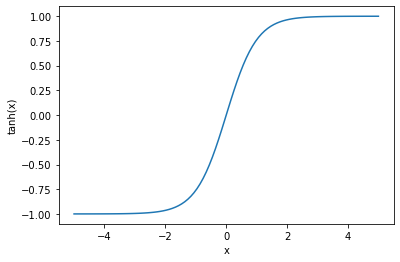

In [4]:
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
tanhx = np.tanh(x)

plt.plot(x, tanhx)
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.show()

Note that we have use `numpy.linspace` to create the `x` array. This is another convenient function to create an array of linearly spaced numbers. If you want logarithmically-spaced numbers, you can use `np.logspace`. More of that [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.array-creation.html).

Finally, also note that `numpy` has high-precision versions of many mathematical constants. More (including `$\infty$`!) [here](https://docs.scipy.org/doc/numpy/reference/constants.html)

In [5]:
print('pi = ', np.pi)
print('e = ', np.e)

pi =  3.141592653589793
e =  2.718281828459045


## 2.2 Linear algebra
`Numpy` also has a very useful [linear algebra package](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html). `np.outer`, `np.dot`, which you saw before, are part of it, but there are also functions to invert matrices, diagonalise them, compute their rank, compute their determinant etc.

In [6]:
# OK, let's create a quick 4x4 array
A = np.arange(16).reshape([4, 4])
print(A)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [7]:
# Let's compute its transpose, its trace and its determinant
print('Transpose:\n', A.T)
print('Trace: ', np.trace(A))
print('Det: ', np.linalg.det(A))

Transpose:
 [[ 0  4  8 12]
 [ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]]
Trace:  30
Det:  0.0


In [8]:
# Since the determinant is zero, we won't be able to invert it
print(np.linalg.inv(A))

LinAlgError: Singular matrix

In [9]:
# But let's add the identity (i.e. we add +1 in the diagonal), and we'll make it invertible
B = A + np.identity(4)
print('B:\n', B)
Binv = np.linalg.inv(B)
print('B^-1:\n', Binv)

B:
 [[ 1.  1.  2.  3.]
 [ 4.  6.  6.  7.]
 [ 8.  9. 11. 11.]
 [12. 13. 14. 16.]]
B^-1:
 [[-0.14285714 -0.63265306 -0.12244898  0.3877551 ]
 [-0.57142857  0.6122449  -0.20408163 -0.02040816]
 [ 0.         -0.14285714  0.71428571 -0.42857143]
 [ 0.57142857  0.10204082 -0.36734694  0.16326531]]


In [10]:
# Let's check it's the actual inverse! (up to numerical precision)
print(np.einsum('ij,jk', Binv, B))

[[ 1.00000000e+00 -8.88178420e-16 -8.88178420e-16 -8.88178420e-16]
 [ 2.22044605e-16  1.00000000e+00  1.11022302e-16 -1.66533454e-16]
 [ 8.88178420e-16  0.00000000e+00  1.00000000e+00  8.88178420e-16]
 [-4.44089210e-16  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


## 2.3 Random numbers
Finally, random numbers are ubiquitous in many physics problems. `numpy` comes with a very convenient [set of functions](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html) to generate random numbers following different probability distributions.

The basic functionality is to generate random numbers, evenly distributed between zero and 1:

In [11]:
# Let's generate 1000 random numbers between zero and 1
r = np.random.rand(1000)
# Let's print the first 10 of them:
print(r[:10])

[0.78123588 0.99860988 0.63752325 0.60176838 0.38236012 0.17102698
 0.98774924 0.91209379 0.70582048 0.43153385]


To check that they are actually randomly distributed, let's plot a histogram of their values. We would expect this histogram to be roughly a top-hat function.

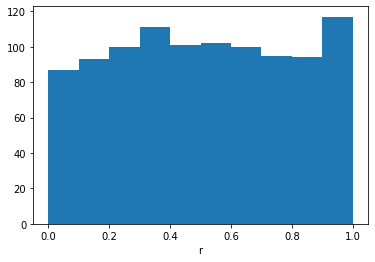

In [12]:
import matplotlib.pyplot as plt
plt.hist(r)
plt.xlabel('r')
plt.show()

However, you can also generate random numbers according to many other distributions. The most common one is the "normal" or Gaussian distribution:
\begin{equation}
p(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}}
\end{equation}

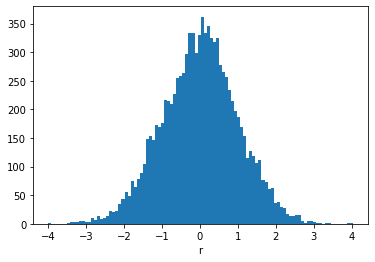

In [13]:
r = np.random.randn(10000)
plt.hist(r, bins=100)
plt.xlabel('r')
plt.show()